In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import geopandas as gpd 
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
import matplotlib.ticker as mticker

In [2]:
df=pd.read_csv('C:\\Users\\xuebi\\Desktop\\Jupyter nootbook\\Summer 2017 REU\\seasonal_by_tract.csv')

In [3]:
df.head()

complaint_type created_date  1000100.0  1000201.0  1000202.0  \
0  Street Light Condition   2003-12-01        NaN        NaN        NaN   
1           Water Quality   2003-12-01        NaN        NaN        NaN   
2                Plumbing   2003-12-01        NaN        NaN        1.0   
3              Electrical   2003-12-01        NaN        NaN        NaN   
4        Dirty Conditions   2003-12-01        NaN        NaN        NaN   

   1000500.0  1000600.0  1000700.0  1000800.0  1000900.0    ...      \
0        NaN        NaN        NaN        NaN        NaN    ...       
1        NaN        NaN        NaN        NaN        NaN    ...       
2        NaN        NaN        NaN        NaN        NaN    ...       
3        NaN        NaN        2.0        NaN        NaN    ...       
4        NaN        NaN        NaN        NaN        NaN    ...       

   5027706.0  5027900.0  5029102.0  5029103.0  5029104.0  5030301.0  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        1.0        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4        NaN        NaN        NaN        NaN        NaN        NaN   

   5030302.0  5031901.0  5031902.0  5032300.0  
0        NaN        NaN        NaN        NaN  
1        NaN        NaN        NaN        NaN  
2        NaN        NaN        NaN        NaN  
3        NaN        NaN        1.0        NaN  
4        NaN        NaN        NaN        NaN  

[5 rows x 2165 columns]

In [4]:
calls=pd.melt(df,id_vars=['complaint_type','created_date'] 
              #create the column of complaint type and created date
              ,var_name=['boro_ct201']
              #this create a value column out of boro_ct201
             )

In [5]:
calls.head()

complaint_type created_date boro_ct201  value
0  Street Light Condition   2003-12-01  1000100.0    NaN
1           Water Quality   2003-12-01  1000100.0    NaN
2                Plumbing   2003-12-01  1000100.0    NaN
3              Electrical   2003-12-01  1000100.0    NaN
4        Dirty Conditions   2003-12-01  1000100.0    NaN

In [6]:
sewer=calls[calls['complaint_type'].str.match('Sewer')]
#taking out all the sewer 

In [7]:
sewer['boro_ct201']=sewer['boro_ct201'].str[:7]
sewer.head()

C:\Users\xuebi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


complaint_type created_date boro_ct201  value
5           Sewer   2003-12-01    1000100    NaN
30          Sewer   2004-03-01    1000100    NaN
46          Sewer   2004-06-01    1000100    NaN
72          Sewer   2004-09-01    1000100    NaN
98          Sewer   2004-12-01    1000100    NaN

In [8]:
sewerMed=sewer.copy().rename(columns={'value':'Med_value'})
sewerMed.head()

complaint_type created_date boro_ct201  Med_value
5           Sewer   2003-12-01    1000100        NaN
30          Sewer   2004-03-01    1000100        NaN
46          Sewer   2004-06-01    1000100        NaN
72          Sewer   2004-09-01    1000100        NaN
98          Sewer   2004-12-01    1000100        NaN

In [9]:
smed=sewerMed.groupby('boro_ct201').agg({'Med_value':'median'})
smed.head()

Med_value
boro_ct201           
1000100           NaN
1000201           2.0
1000202           2.0
1000500           NaN
1000600           3.0

In [10]:
sewerSum=sewer.copy().rename(columns={'value':'Sum_value'})
sewerSum.head()

complaint_type created_date boro_ct201  Sum_value
5           Sewer   2003-12-01    1000100        NaN
30          Sewer   2004-03-01    1000100        NaN
46          Sewer   2004-06-01    1000100        NaN
72          Sewer   2004-09-01    1000100        NaN
98          Sewer   2004-12-01    1000100        NaN

In [12]:
ssum=sewerSum.groupby('boro_ct201').agg({'Sum_value':'sum'})
ssum.head()

Sum_value
boro_ct201           
1000100           NaN
1000201          50.0
1000202         155.0
1000500           NaN
1000600         231.0

In [13]:
shpfile = 'C:\\Users\\xuebi\\Desktop\\census_tracts\\census_tracts\\census2010.shp'
coord_system = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame.from_file(shpfile, crs=coord_system)

In [17]:
MedT=gdf.copy()[['boro_ct201','geometry']].merge(smed
            ,left_on='boro_ct201',right_index=True)
#merge two dataframe together,merging the column boro_ct201 
#with the index in smed

In [16]:
MedT.head()

boro_ct201                                           geometry  Med_value
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...        5.0
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...        7.0
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...        7.0
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...        7.0
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...        4.0

In [18]:
SumT=gdf.copy()[['boro_ct201','geometry']].merge(ssum
            ,left_on='boro_ct201',right_index=True)
#merge two dataframe together,merging the column boro_ct201 
#with the index in smed
SumT.head()

boro_ct201                                           geometry  Sum_value
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...      314.0
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...      621.0
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...      467.0
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...      457.0
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...      312.0

In [22]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=MedT['Med_value'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
for _, row in MedT.iterrows():
    color = cmap(norm(row['Med_value']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("median # of sewer complaints over time" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [23]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=SumT['Sum_value'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),
                       subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], 
              ccrs.Geodetic())
for _, row in SumT.iterrows():
    color = cmap(norm(row['Sum_value']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],
                          facecolor=color, edgecolor='black')
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("Sum # of sewer complaints over time" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


In [26]:
sewer.head()

complaint_type created_date boro_ct201  value
5           Sewer   2003-12-01    1000100    NaN
30          Sewer   2004-03-01    1000100    NaN
46          Sewer   2004-06-01    1000100    NaN
72          Sewer   2004-09-01    1000100    NaN
98          Sewer   2004-12-01    1000100    NaN

In [31]:
sw=sewer.pivot_table(index='created_date',columns='boro_ct201')['value']

In [32]:
sw.head()

boro_ct201    1000201  1000202  1000600  1000700  1000800  1000900  1001001  \
created_date                                                                  
2003-12-01        NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2004-03-01        NaN      NaN      7.0      9.0     15.0     10.0      NaN   
2004-06-01        3.0      5.0      2.0     15.0     10.0     18.0      NaN   
2004-09-01        1.0      1.0      6.0     13.0      4.0     21.0      1.0   
2004-12-01        NaN      2.0      2.0      3.0      6.0     14.0      1.0   

boro_ct201    1001002  1001200  1001300   ...     5027706  5027900  5029102  \
created_date                              ...                                 
2003-12-01        NaN      NaN      NaN   ...         NaN      NaN      NaN   
2004-03-01        6.0      1.0      2.0   ...         1.0      3.0     20.0   
2004-06-01        9.0      1.0     12.0   ...         4.0     18.0     28.0   
2004-09-01        9.0      5.0     10.0   ...         6.0      4.0     19.0   
2004-12-01        5.0      5.0      7.0   ...         2.0     14.0     30.0   

boro_ct201    5029103  5029104  5030301  5030302  5031901  5031902  5032300  
created_date                                                                 
2003-12-01        NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2004-03-01       29.0     28.0     12.0      7.0      3.0     16.0      5.0  
2004-06-01       30.0     18.0     15.0     17.0      3.0     16.0      3.0  
2004-09-01       12.0     22.0     25.0     13.0      4.0     12.0     12.0  
2004-12-01       31.0     26.0     10.0      5.0      3.0     17.0      3.0  

[5 rows x 2160 columns]

In [33]:
L=['2003-12-01','2004-03-01' ,'2004-06-01' ,'2004-09-01', '2004-12-01'
, '2005-03-01' ,'2005-06-01' ,'2005-09-01' ,'2005-12-01' ,'2006-03-01'
 ,'2006-06-01' ,'2006-09-01' ,'2006-12-01' ,'2007-03-01' ,'2007-06-01'
 ,'2007-09-01' ,'2007-12-01' ,'2008-03-01' ,'2008-06-01' ,'2008-09-01'
 ,'2008-12-01' ,'2009-03-01' ,'2009-06-01' ,'2009-09-01' ,'2009-12-01'
 ,'2010-03-01' ,'2010-06-01' ,'2010-09-01' ,'2010-12-01' ,'2011-03-01'
 ,'2011-06-01' ,'2011-09-01' ,'2011-12-01' ,'2012-03-01' ,'2012-06-01'
 ,'2012-09-01' ,'2012-12-01' ,'2013-03-01' ,'2013-06-01' ,'2013-09-01'
 ,'2013-12-01' ,'2014-03-01' ,'2014-06-01' ,'2014-09-01' ,'2014-12-01'
 ,'2015-03-01' ,'2015-06-01' ,'2015-09-01' ,'2015-12-01' ,'2016-03-01'
 ,'2016-06-01' ,'2016-09-01' ,'2016-12-01' ,'2017-03-01' ,'2017-06-01']
K=dict()
for i in L[2::5]:
    K[i]=sw.loc[i]

In [35]:
test=pd.DataFrame(K)
test.index.names=['boro_ct201']

In [36]:
test.head()

2004-06-01  2005-09-01  2006-12-01  2008-03-01  2009-06-01  \
boro_ct201                                                               
1000201            3.0         NaN         NaN         4.0         1.0   
1000202            5.0         3.0         3.0         4.0         2.0   
1000600            2.0         4.0         2.0         6.0         1.0   
1000700           15.0        28.0         3.0        11.0         6.0   
1000800           10.0        14.0         4.0         8.0         6.0   

            2010-09-01  2011-12-01  2013-03-01  2014-06-01  2015-09-01  \
boro_ct201                                                               
1000201            1.0         NaN         1.0         2.0         NaN   
1000202            1.0         NaN         NaN         2.0         1.0   
1000600            5.0         2.0         2.0         4.0         NaN   
1000700           10.0         NaN         4.0         6.0         4.0   
1000800            2.0         1.0         NaN         7.0         1.0   

            2016-12-01  
boro_ct201              
1000201            1.0  
1000202            2.0  
1000600            1.0  
1000700            NaN  
1000800            1.0

In [37]:
tracts=gdf.copy()[['boro_ct201','geometry']].merge(test,
                   left_on='boro_ct201',right_index=True)
tracts.head()

boro_ct201                                           geometry  2004-06-01  \
0    5000900  POLYGON ((-74.07920577013245 40.64343078374567...        13.0   
1    1009800  POLYGON ((-73.96432543478758 40.75638153099091...        32.0   
2    1010000  POLYGON ((-73.96802436915851 40.75957814005282...        21.0   
3    1010200  POLYGON ((-73.97124277307127 40.76093641847906...         4.0   
4    1010400  POLYGON ((-73.97445730550224 40.76229308352487...         4.0   

   2005-09-01  2006-12-01  2008-03-01  2009-06-01  2010-09-01  2011-12-01  \
0         5.0         4.0        10.0         7.0         2.0         5.0   
1        19.0        16.0        11.0        10.0         5.0         1.0   
2        13.0         6.0        34.0        12.0         7.0         4.0   
3        21.0         8.0        27.0        12.0         9.0         1.0   
4        10.0         4.0        12.0        10.0         3.0         7.0   

   2013-03-01  2014-06-01  2015-09-01  2016-12-01  
0         5.0         4.0         1.0         1.0  
1         3.0         4.0         4.0         3.0  
2         6.0         7.0        10.0         7.0  
3         1.0         2.0         3.0         3.0  
4         2.0         2.0         3.0         5.0

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


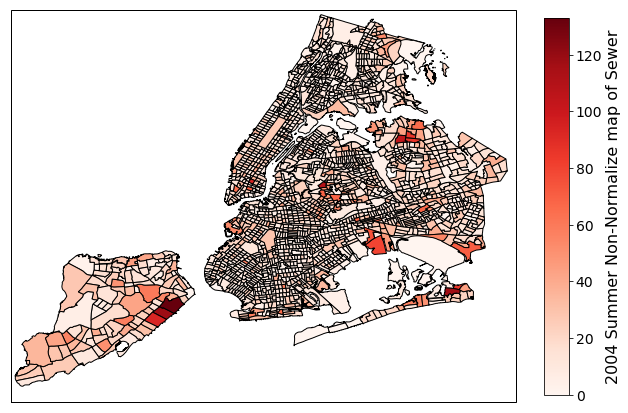

In [39]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2004-06-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2004-06-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2004 Summer Non-Normalize map of Sewer" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


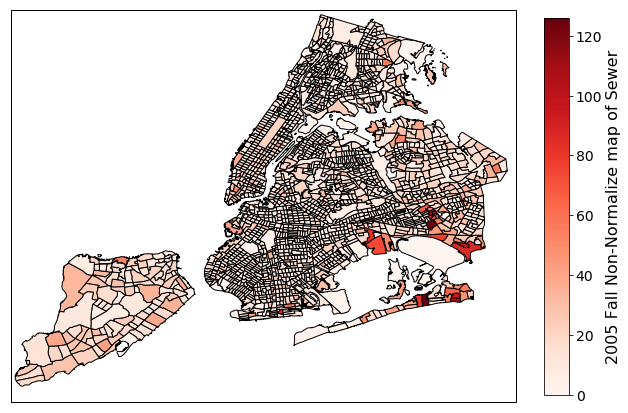

In [40]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2005-09-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2005-09-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2005 Fall Non-Normalize map of Sewer" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


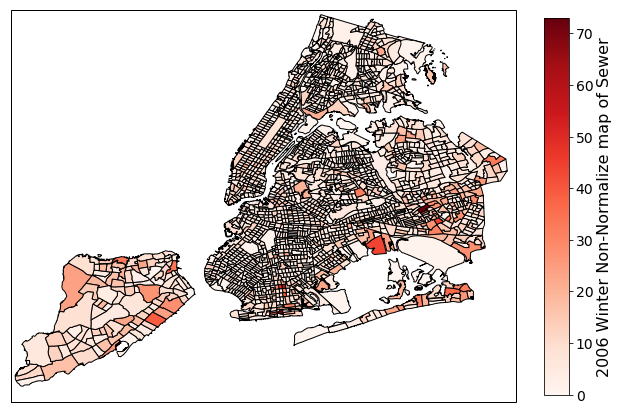

In [41]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2006-12-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2006-12-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2006 Winter Non-Normalize map of Sewer" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


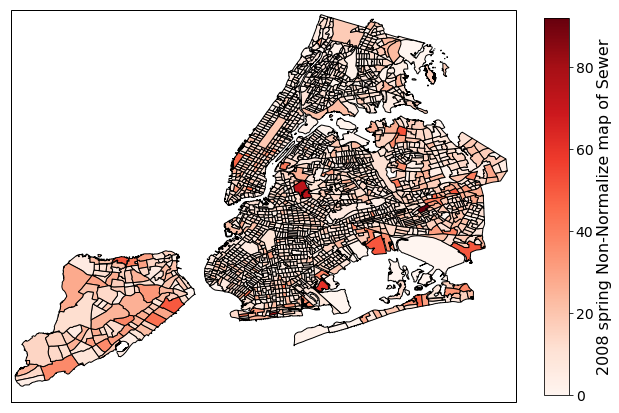

In [42]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2008-03-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2008-03-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2008 spring Non-Normalize map of Sewer" , fontsize=16)

C:\Users\xuebi\Anaconda3\lib\site-packages\matplotlib\colors.py:496: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


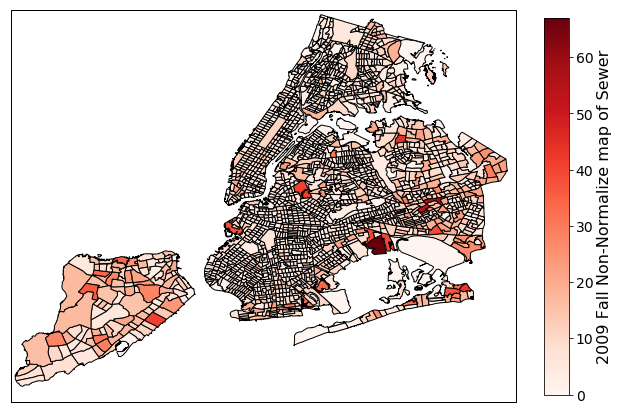

In [43]:
cmap=mcm.Reds
norm=mcolors.Normalize(vmin=0,vmax=tracts['2009-06-01'].max())
%matplotlib inline
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(10, 10),subplot_kw=subplot_kw)
ax.background_patch.set_visible(False)
#get bounding box for city
#[-73.700272, -74.2590, 40.477399, 40.917577]
ax.set_extent([-73.69, -74.26, 40.477395, 40.92], ccrs.Geodetic())
for _, row in tracts.iterrows():
    color = cmap(norm(row['2009-06-01']))
    ax.add_geometries([row['geometry']], subplot_kw['projection'],facecolor=color, edgecolor='black')

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
cb = fig.colorbar(sm, ax=ax, fraction=.045, pad=.05, aspect=15)
cb.ax.tick_params(labelsize=14)
cb.set_label("2009 Fall Non-Normalize map of Sewer" , fontsize=16)